# ASSESSING FACTORS INFLUENCING STUDENTS' LEARNING ABILITY

### INTRODUCTION

**Project Background Information**

One pertinent question looming over educators' heads worldwide is: **what are the most important factors that determine a student's ability to learn?** Large discrepancies in student's grades exist within most schools, despite receiving the same shared resources (e.g. teachers, books, etc.) within school and educational curriculum between schools. 

We will use grades as an indication of a student's ability to learn, reflecting their ability to grasp concepts learned. Although in reality, this assumption does not always hold, we have chosen grades as our response variable to reflect one's learning ability because it is still the golden standard used in most educational institutions worldwide.


**Project Question** 

How do the factors of a student's health, family relationship quality, and school attendance (individually and collectively) impact their ability to learn? Or more specifically: **How is each student's learning ability (reflected in their final grades) impacted by their attendance record at school, family relationships, and personal health individually and collectively as a group of predictor variables?** And consequently, what can parents, students, and schools do (based on our research) to improve students' ability to learn?


**Dataset Description:**

The dataset is taken from two Portuguese schools and measures several of their secondary student's attributes. We understand that the given dataset is not reflective other schools worldwide, but is a good starting point as we explore answers to the question.

### RESEARCH METHODS

_The following steps outline the methods we have taken to perform our analysis from beginning to end and narrates what the code does in the context of our analysis:_

#### Step 1 : Formulate a Defined Hypothesis
Formulate a hypothesis based on research findings to answer the overarching research question: **what factors (included in the data set) have the most impact on students' final grades?** 

Out of the many different variables measured in the data set, we picked three variables based on our research that we believe could have significant impacts on students' performance in school. The three variables and our reasoning for picking each of them are as follows:

1. **Absences:** We predict a negative correlation between absences and grades; students who are frequently absent from school are expected to have lower final grades.

2. **Family Relations:** We expect that a positive correlation between family relationships and grades; students with higher positive relationships ratings with their family members are likely to have higher final grades.

3. **Health Status:** We expect a positive correlation between health and grades; healthier students, indicated by having higher health ratings, are expected to have higher final grades.

Hence, we will be looking at **which of the three variables is the best predictor of final grades? And is a model using all three predictors perform better at predicting final grades than any of the model with a single predictor?**


#### Step 2: Clean the Data for Exploratory Analysis

After defining our objectives, we will clean the data and select the relevant columns from the dataset: G3, absences, health, and family relations that will be used for our analysis. This includes:

1. Loading relevant libraries for analysis
2. Reading the data directly from its online source.
3. Taking a glimpse at the data and assessing whether further data cleaning is required.
4. Selecting only the data that are relevant to our research.


#### Step 3: Explore and Analyze the Data

We will make scatterplots of each variable against their final grades (G3) to determine whether k-nn or linear regression are suitable and will give use the best results for each variable. If the scatterplot shows something resembling a clear linear trend, we will use linear regression; otherwise, we will use k-nn regression. Once we have chosen a methods for each variable, we will go ahead with building our regression models.

For both types of regression, we will first seperate the data into a testing set and a training set. We will then set the testing data aside and conduct the following:

**For linear regression models:**

1. Create model specification.
2. Create recipe.
3. Create workflow that integrates model specification and recipe and fits the training data to the workflow.
4. Take note of the equation of the line of best fit.
5. Graph line of best fit over scatterplot of testing data to visualize relationship.
6. Apply the model to the testing data and evaluate the level of error.

**For k-nn regression models:**

1. Center and scale predictors.
2. Create model specification.
3. Create recipe.
4. Perform a vfold (v = 5).
5. Create a workflow that integrates model specification and recipe and fits the training data to the workflow.
6. Tune the model to find the best value of k neighbors by filtering the output for the minimum RMSPE value.
7. Evaluate the model using the same recipe and model specification, but use the testing data. Take note of the RMSPE value to evaluate level of error.
8. Graph results on top of the scatterplot.


#### Step 4: Compare Findings to Hypothesis & Research Question

Finally, we will evaluate the results by comparing levels of error based on RMSE values. If the RMSE values are all identical, we will take a assess the results based on which best answers on research question: **which of the three variables has the largest impact on final grades?** This can be done by assessing which of the predictor variables has the strongest (positive or negative) trend with final grades.

Finally, perform a multivariare regression model to see the effects of all three predictors combined. **Does a model using all three predictors perform better at predicting final grades than any of the model with a single predictor?**

### RESEARCH RESULTS

Load relevant libraries...

In [3]:
library(tidyverse)
library(repr)
library(caret)
library(ggplot2)
library(tidymodels)
library(forcats)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9

Read the data directly from it's online source and take a glimpse to assess if further data cleansing is required...

In [4]:
download.file ("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", "student.zip")

unzip("student.zip")

student_data <- read_delim("student-por.csv", delim = ";")

glimpse (student_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



Rows: 649
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2, 1, 1, 1,

Select relevant data required for analysis...

In [5]:
student_data <- student_data %>% 
            select (G3, absences, famrel, health)

student_data %>% head (10)

G3,absences,famrel,health
<dbl>,<dbl>,<dbl>,<dbl>
11,4,4,3
11,2,5,3
12,6,4,3
14,0,3,5
13,0,4,5
13,6,5,5
13,0,4,3
13,2,4,1
17,0,4,1


Split the data into training and testing set...

In [6]:
set.seed (1)

student_split <- initial_split(student_data, prop = 0.7, strata = G3)
student_train <- training(student_split)
student_test <- testing(student_split)

Explore the data with tables and graphs...

In [7]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of number of absences

absences_summary <- group_by (student_train, absences) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
absences_summary

`summarise()` ungrouping output (override with `.groups` argument)



absences,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
0,0,19,12.142012
1,10,16,12.500000
2,7,18,12.306667
3,7,17,11.000000
4,6,19,11.865672
5,8,17,11.750000
6,8,17,12.303030
7,8,16,13.000000
8,7,15,11.586207


In [8]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

famrel_summary <- group_by (student_train, famrel) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
famrel_summary

`summarise()` ungrouping output (override with `.groups` argument)



famrel,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
1,0,15,9.090909
2,0,15,10.352941
3,0,19,11.573333
4,0,18,12.432432
5,0,18,11.770992


In [9]:
# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of current health status (numeric: from 1 - very bad to 5 - very good)

health_summary <- group_by (student_train, health) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
health_summary

`summarise()` ungrouping output (override with `.groups` argument)



health,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
1,0,18,12.66129
2,0,19,12.44828
3,0,19,11.82143
4,0,18,12.08108
5,0,18,11.52809


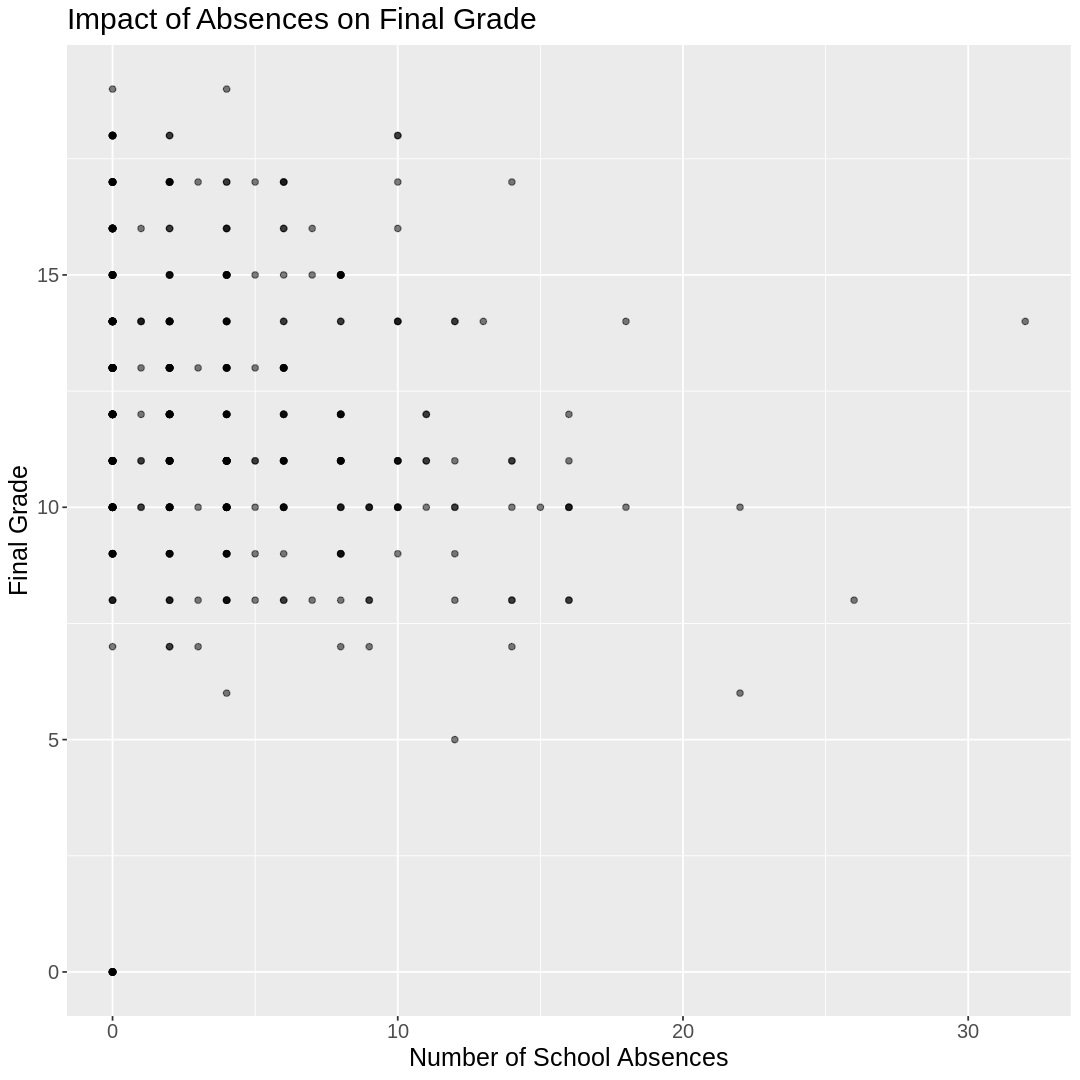

In [40]:
options(repr.plot.width = 9, repr.plot.height = 9)

absences_plot <- ggplot(student_train, aes(x = absences, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Number of School Absences") +
  ylab("Final Grade") + 
    labs (title = "Impact of Absences on Final Grade") +
theme(text = element_text(size=15)) 

absences_plot

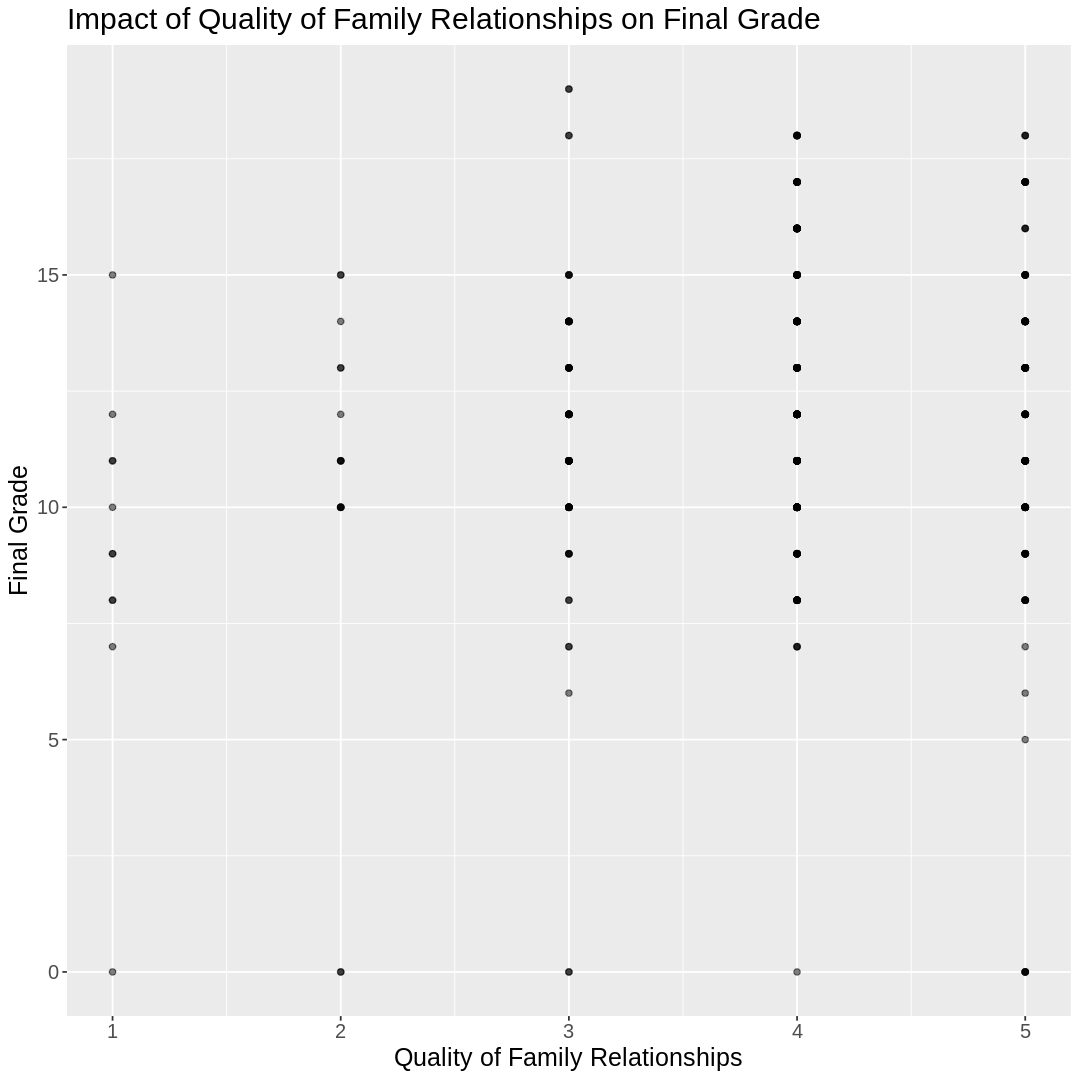

In [41]:
famrel_plot <- ggplot(student_train, aes(x = famrel, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Quality of Family Relationships") +
  ylab("Final Grade") + 
    labs (title = "Impact of Quality of Family Relationships on Final Grade") +
theme(text = element_text(size=15)) 

famrel_plot

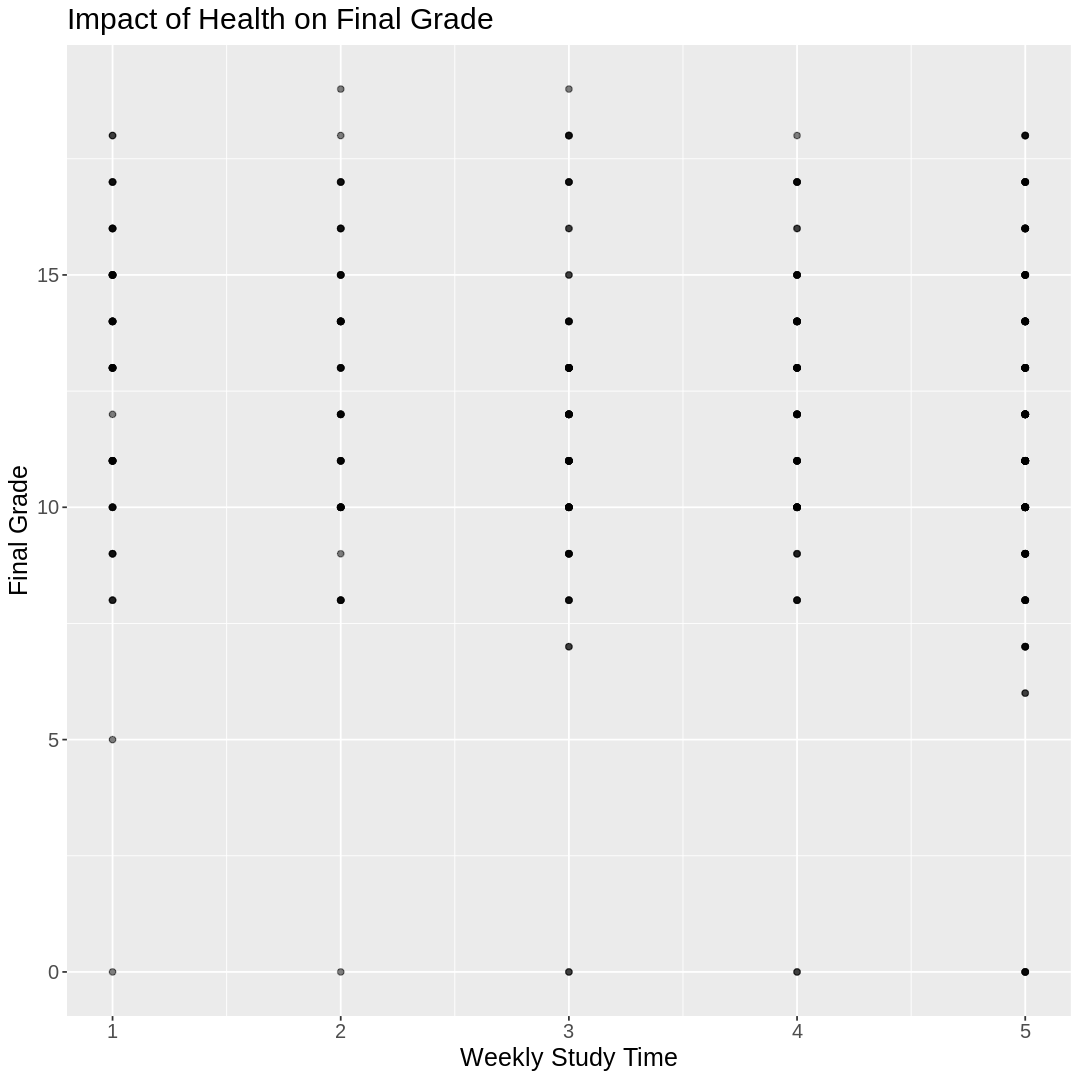

In [42]:
health_plot <- ggplot(student_train, aes(x = health, y = G3)) + 
  geom_point(alpha = 0.5) + 
  xlab("Weekly Study Time") +
  ylab("Final Grade") + 
    labs (title = "Impact of Health on Final Grade") +
theme(text = element_text(size=15)) 

health_plot

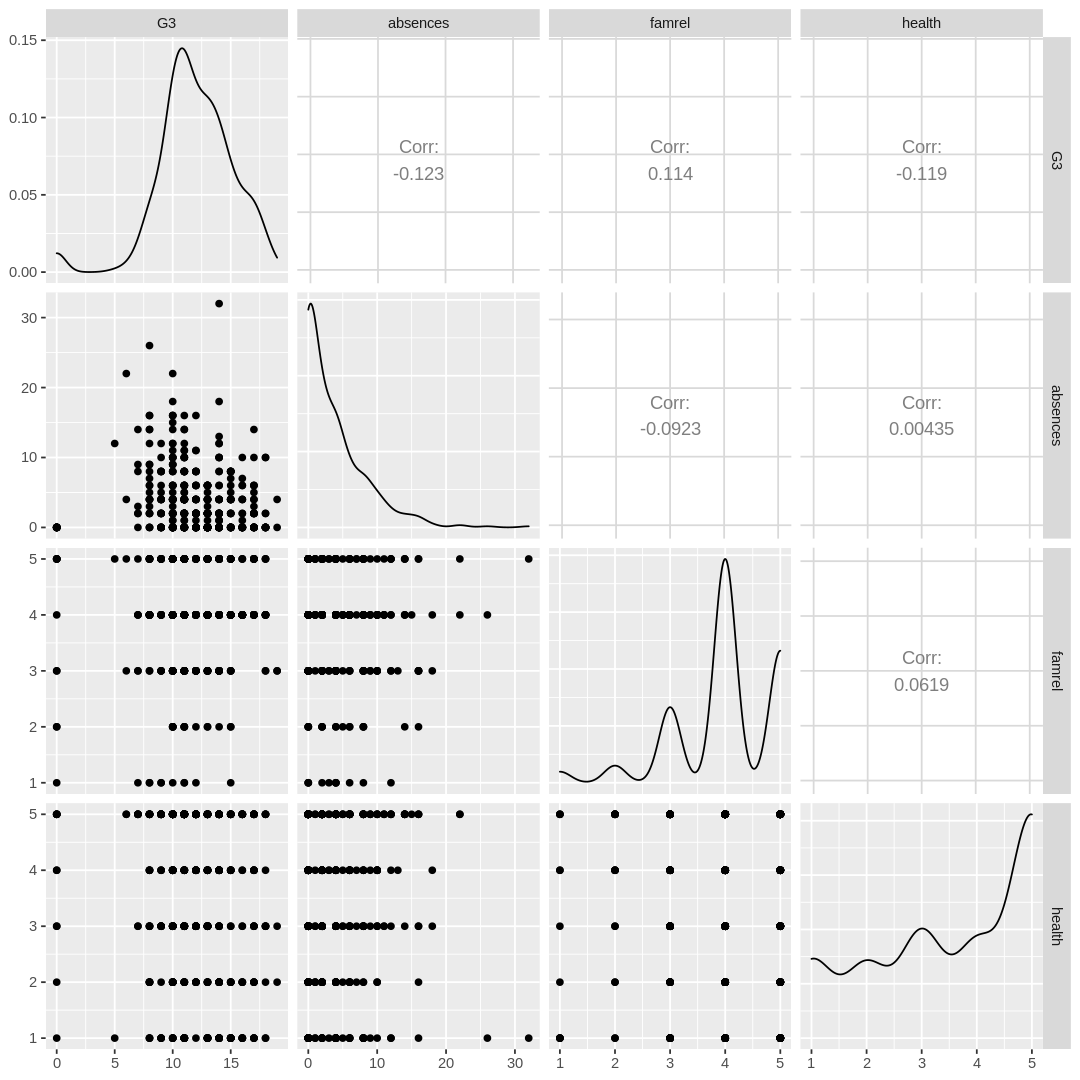

In [13]:
plot_pairs <- student_train %>%
  select(G3, absences, famrel, health) %>%
  ggpairs()
plot_pairs

Based on our above presented initial exploratory analysis, we decided to use k-nn regression modelgs instead of linear regression models for our further analysis. This is because the above scatterplots did not indicate a clear visual linear relationship, and the correlation coefficients present in the above graph were small. 

In [14]:
#k-nn regression with first predictor, absences

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

absences_recipe <- recipe(G3 ~ absences, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_vfold <- vfold_cv(student_train, v = 5, strata = G3)

absences_wkflw <- workflow() %>%
  add_recipe(absences_recipe) %>%
  add_model(student_spec)

In [15]:
gridvals <- tibble(neighbors = seq(1, 200))

absences_results <- absences_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

absences_min <- absences_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
absences_min

#this indicates k with the lowest rmse on the basis of cross-validation and tuning

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,rmse,standard,3.227304,5,0.245183,Model029


In [16]:
absences_kmin <- absences_min %>% pull(neighbors)

absences_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = absences_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

absences_fit <- workflow() %>%
  add_recipe(absences_recipe) %>%
  add_model(absences_spec) %>%
  fit(data = student_train)

absences_summary <- absences_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
absences_summary

# rmspe with testing data, with chosen k

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.1787065398
rsq,standard,0.0008774348
mae,standard,2.3367875648


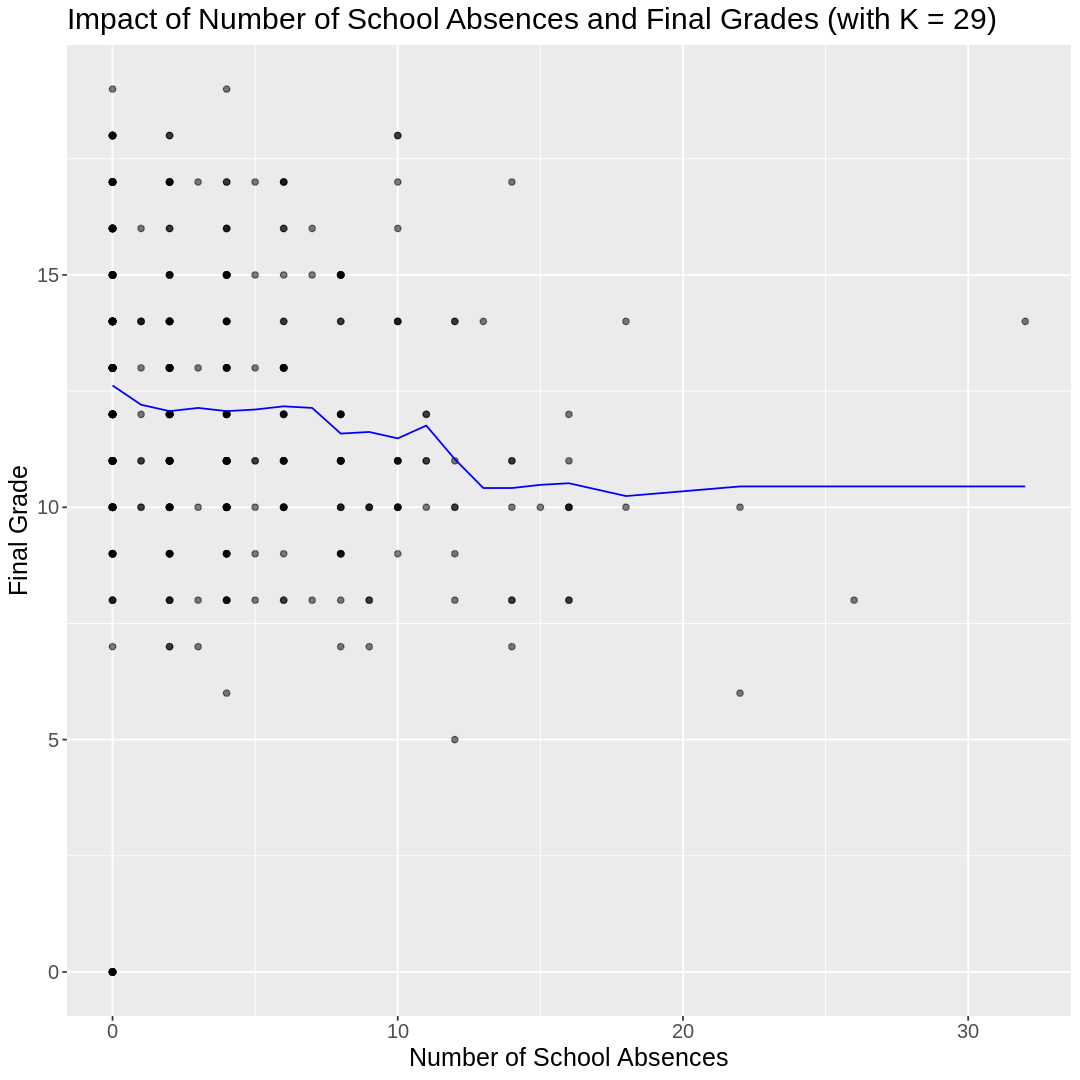

In [43]:
absences_preds <- absences_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

absences_plot <- ggplot(absences_preds, aes(x = absences, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Number of School Absences") +
  ylab("Final Grade") +
  geom_line(data = absences_preds, aes(x = absences, y = .pred), color = "blue") +
  ggtitle(paste0("Impact of Number of School Absences and Final Grades (with K = ", absences_kmin,")")) +
theme(text = element_text(size=15)) 

absences_plot

# scatterplot with k-nn regression line

In [23]:
# repeat of k-nn regression analysis with second predictor, quality of family relationships

famrel_recipe <- recipe(G3 ~ famrel, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

famrel_wkflw <- workflow() %>%
  add_recipe(famrel_recipe) %>%
  add_model(student_spec)

In [24]:
famrel_results <- famrel_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

famrel_min <- famrel_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
famrel_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
91,rmse,standard,3.203234,5,0.2237975,Model091


In [25]:
famrel_kmin <- famrel_min %>% pull(neighbors)

famrel_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = famrel_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

famrel_fit <- workflow() %>%
  add_recipe(famrel_recipe) %>%
  add_model(famrel_spec) %>%
  fit(data = student_train)

famrel_summary <- famrel_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
famrel_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.18103110
rsq,standard,0.00239548
mae,standard,2.34732107


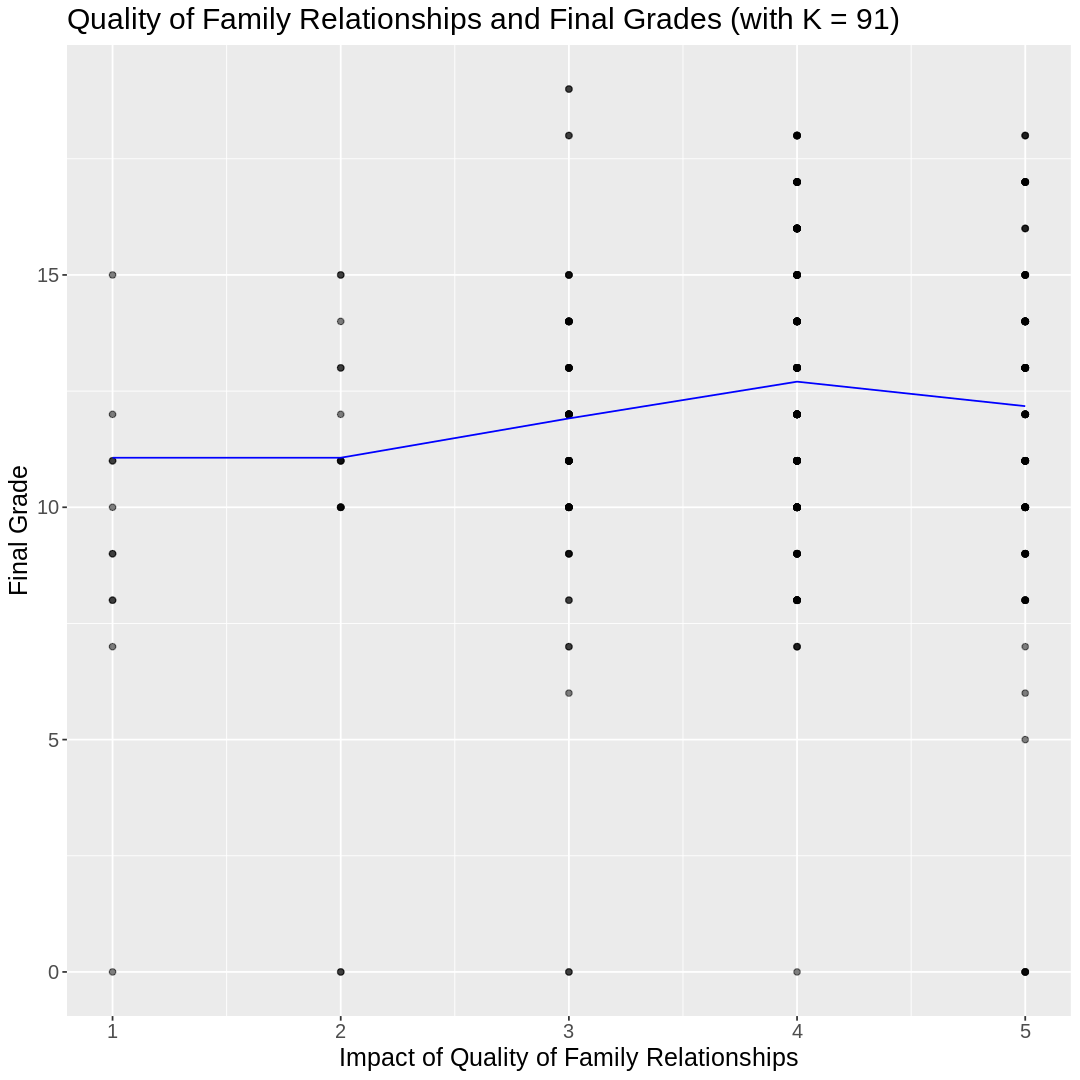

In [44]:
famrel_preds <- famrel_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

famrel_plot <- ggplot(famrel_preds, aes(x = famrel, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Impact of Quality of Family Relationships") +
  ylab("Final Grade") +
  geom_line(data = famrel_preds, aes(x = famrel, y = .pred), color = "blue") +
  ggtitle(paste0("Quality of Family Relationships and Final Grades (with K = ", famrel_kmin,")")) +
  theme(text = element_text(size=15)) 
famrel_plot

In [27]:
# repeat of k-nn analysis with third predictor, health

health_recipe <- recipe(G3 ~ health, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

health_wkflw <- workflow() %>%
  add_recipe(health_recipe) %>%
  add_model(student_spec)

In [28]:
health_results <- health_wkflw %>%
  tune_grid(resamples = student_vfold, grid = gridvals) %>%
  collect_metrics()

health_min <- health_results %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean))
health_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
114,rmse,standard,3.227498,5,0.2356295,Model114


In [29]:
health_kmin <- health_min %>% pull(neighbors)

health_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = health_kmin) %>%
  set_engine("kknn") %>%
  set_mode("regression")

health_fit <- workflow() %>%
  add_recipe(health_recipe) %>%
  add_model(health_spec) %>%
  fit(data = student_train)

health_summary <- health_fit %>%
  predict(student_test) %>%
  bind_cols(student_test) %>%
  metrics(truth = G3, estimate = .pred)
health_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.130846181
rsq,standard,0.004066698
mae,standard,2.327379329


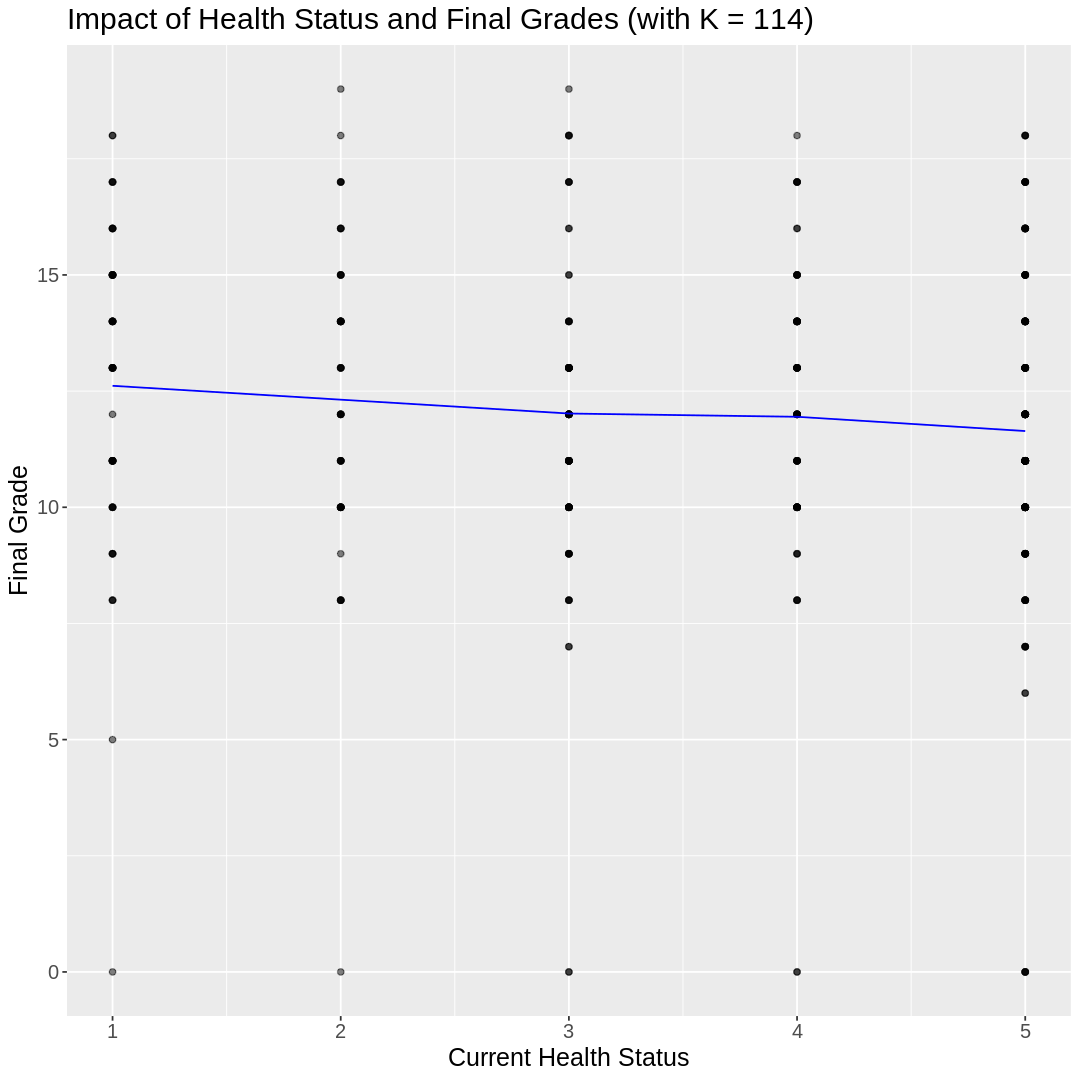

In [45]:
health_preds <- health_fit %>%
  predict(student_train) %>%
  bind_cols(student_train)

health_plot <- ggplot(health_preds, aes(x = health, y = G3)) +
  geom_point(alpha = 0.5) +
  xlab("Current Health Status") +
  ylab("Final Grade") +
  geom_line(data = health_preds, aes(x = health, y = .pred), color = "blue") +
  ggtitle(paste0("Impact of Health Status and Final Grades (with K = ", health_kmin,")")) +
  theme(text = element_text(size=15)) 
health_plot

Add a multivariate regression model, with all three predictors, and compare to the individual models...

In [37]:
student_recipe <- recipe(G3 ~ absences + famrel + health, data = student_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

In [38]:
student_k <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  tune_grid(student_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  filter(mean == min(mean)) %>%
  pull(neighbors)
student_k

[1] 25

In [39]:
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = student_k) %>%
  set_engine("kknn") %>%
  set_mode("regression")

student_fit <- workflow() %>%
  add_recipe(student_recipe) %>%
  add_model(student_spec) %>%
  fit(data = student_train)

student_preds <- student_fit %>%
  predict(student_test) %>%
  bind_cols(student_test)

student_mets <- metrics(student_preds, truth = G3, estimate = .pred)
student_mets

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.202253093
rsq,standard,0.005308594
mae,standard,2.371813472


## Discussion of Outcomes

#### Summary

Upon prelimary analysis of each scatter plot there are does not seem to be any significant relationships between the predictors and target variables in the data, this could possibly be due to the fact that within these scatterplots many of the data points are stacked on top of one another caused by many students having the same final grades and circumstances.  However, with the use of K-nearest neighbor regression we find that each regression model provides a similar RMSPE of around 3 which makes it difficult to choose a single best predictor that has the largest impact on students' learning ability. 

In order to work around similar RMSE values, we instead looked at the trends that are present within the k-nn regression plots. We observed the following:

- **Number of Absences:** There is a ~20-25% drop in final grades as the number of absences increases from 0 to ~18 absences suggesting that a number of absences is negatively correlated trend with students' ability to learn (within certain n boundaries). However, the impact of number of absences on grades plateaus after the number of absences is n > ~18.

- **Family Relationships:** There is a ~10-15% increase in final grades as family relationship (on a scale of 1-5) increases from 2 to 4/5 points; indicating a positive correlated trend between family relationship quality and students' ability to learn.

- **Student Health:** There seems to be no trend present in the relationship between final grades and a students health status (on a scale of 1-5); this may imply that a students' individual health has no significant effect on a students academic performance.

Hence, based on the RMSE (all of which are relatively equavilent) and strength of trend in each of the predictor variables, it can be seen **that number of absences seems to have the most impact on a students' ability to learn** (notice the ~20-25% drop in grades vs. ~10-15% increase for family relationships).

Additionally, we observe relatively high k values for family relationship (k = 91) and student health (k = 114) predictors; this could result in underfitting of the data, given that there is low variance and high bias in the data. This means that since the k-nn regression model has so many data points to consider, if one of those points were to change it would have virtually no effect on the model. Thus, this further reinstates our conclusion that using the number of absences model is the best predictor to improve students' ability to learn if we use the model with additional data points in the future.

#### Comparison to Expected Outcomes

- **Absences:** as expected, there is a negative correlation trend between number of absences and final grades.
- **Family Relationships:** as expected, there is a positive correlation trend between quality of family relationship and final grades.
- **Student Health:** we expected to find a more prominent effect on final grades due to the health status of the students such as higher grades from students who have relatively better health status rating compared to the those with a lower rating, however no effect was shown. 

#### How Could This Impact Students in the Future?

The results of this research provide insight to educators, parents, and students on how students can increase their quality of education / ability to learn. For example, the results show that students who are more frequently present in class are likely to achieve higher academic scores (a reflection of learning quality). This may be a direct result of students falling behind in class due to missed participation or some indirect representation of emotional / psychological symptoms (e.g. lack of discipline to attend school leads to lack of discipline to study). Whichever the case, **the research indicates that reducing absences may lead better quality of learning for students and that the next appropriate step would be to dive deeper into the root causes of absences.**

Then, after diagnosing the root and causal factors that impact students' ability to learn (as reflected in increase in the number of absences), educators and parents can take the necessary steps required to increase quality of learning (which will as a result also reduce the number of absences).

#### Future Inquiries

- What is the relative importance of each factor in influencing student performance?
- To what extent can manipulation of these factors or provided resources lead to changes in a student's performance?
- Are there other factors, beyond the ones we investigated, which play a large role in student performance?
- What can schools, parents, and students do to improve students' learning ability given the results of this research?


## References

**Source of data:** P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

**Source of data (url):** https://archive.ics.uci.edu/ml/datasets/Student+Performance


**Supporting Research Web Sources:**
- https://www.oecd.org/site/educeri21st/40600533.pdf
- https://inservice.ascd.org/exploring-learning-and-health-what-influences-a-childs-ability-to-learn/
- https://www.education.vic.gov.au/school/teachers/teachingresources/Pages/identifying-high-ability-students.aspx
- https://owlcation.com/academia/Factors-that-affect-Student-Learning